<font color='#1b5583' size=7 align='center'><p style='text-align: center;'>**Cuarto cuaderno de Python**\
<font color=#19284C size=5>**Juan José Maldonado Portilla**\
<font color=#5DC1B9 size=5>**2170144**
<font color=#aaf0d1  size=5>         **Universidad Industrial de Santander**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io 
from scipy import stats 
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline
from matplotlib import style
from sklearn import svm
import sklearn.metrics as skm

In [2]:
azul= pd.read_excel('./Datos/Datos-azul-timol.xlsx', header=None, usecols=[1,3,5], nrows=20)
conc= pd.read_excel('./Datos/Datos-azul-timol.xlsx', header=None, usecols=[6], nrows=20)
azul

,1,3,5
0,NaN,NaN,NaN
1,Absorbancia,Absorbancia,Absorbancia
2,0.002,0.002,0.002
3,0.1,0.09,0.089
4,0,0,-0.001
5,0.276,0.267,0.267
6,-0.001,-0.001,-0.002
7,0.484,0.482,0.483
8,-0.001,0.001,0.001
9,0.674,0.66,0.659


In [3]:
azul=azul.drop(azul.index[[0,1,4,6,8,10,12,14,16,18]])
conc=conc.drop(conc.index[[0,1,4,6,8,10,12,14,16,18]])
azul

,1,3,5
2,0.002,0.002,0.002
3,0.1,0.09,0.089
5,0.276,0.267,0.267
7,0.484,0.482,0.483
9,0.674,0.66,0.659
11,0.877,0.877,0.877
13,1.042,1.04,1.04
15,1.267,1.267,1.266
17,1.479,1.478,1.477
19,1.644,1.64,1.688


In [4]:
stdazul=(np.std(azul, axis=1)*3)
stdazul

2     0.000000e+00
3     1.489966e-02
5     1.272792e-02
7     2.449490e-03
9     2.054264e-02
11    3.330669e-16
13    2.828427e-03
15    1.414214e-03
17    2.449490e-03
19    6.523803e-02
dtype: float64

In [5]:
azul['molar']=conc
azul['azula']=azul.mean(axis=1)
azul['std']=stdazul
azul

,1,3,5,molar,azula,std
2,0.002,0.002,0.002,0,0.001500,0.000000e+00
3,0.1,0.09,0.089,0.000003,0.069751,1.489966e-02
5,0.276,0.267,0.267,0.00001,0.202503,1.272792e-02
7,0.484,0.482,0.483,0.000017,0.362254,2.449490e-03
9,0.674,0.66,0.659,0.000024,0.498256,2.054264e-02
11,0.877,0.877,0.877,0.000031,0.657758,3.330669e-16
13,1.042,1.04,1.04,0.000038,0.780510,2.828427e-03
15,1.267,1.267,1.266,0.000045,0.950011,1.414214e-03
17,1.479,1.478,1.477,0.000052,1.108513,2.449490e-03
19,1.644,1.64,1.688,0.000059,1.243015,6.523803e-02


In [6]:
x=azul[['molar']]
y=azul[['azula']]

In [7]:
reg = linear_model.LinearRegression()
reg.fit(x, y)
y1_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y1_pred)
r2=skm.r2_score(y, y1_pred)

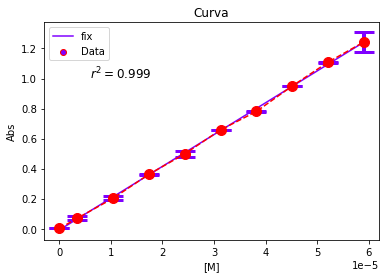

In [8]:
x=azul['molar']
y=azul['azula']
y_error =azul['std']

fig, ax= plt.subplots()
ax.scatter(x, y, color='#7f00ff', label='Data', edgecolors='red')
ax.plot(np.array(x), np.array(y1_pred), color='#7f00ff', label='fix')
ax.legend()
ax.set_title("Curva")
ax.set_xlabel("[M]")
ax.set_ylabel("Abs")
ax.text(0.0000059, 1, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="k")
plt.errorbar(x, y,  yerr=y_error, fmt = '--ro', ms=10, ecolor='#7f00ff', elinewidth = 4, capsize = 10, capthick = 3)
plt.show()
fig.savefig("calcurve.pdf",bbox_inches='tight')

<font color='#0096D' size=7 align='center'><p style='text-align: center;'>**Segunda parte**

In [115]:
spectra = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None) 
attribute1 = pd.read_excel('./Datos/crudos.xlsx', header=None, usecols=[10], nrows=84) 
attribute2 = pd.read_excel('./Datos/crudos.xlsx', header=None, usecols=[11], nrows=84)
J = pd.DataFrame(spectra) 
spectra0 = J.drop(J.index[[0]]) 
spectra1 = spectra0.values 
spectrat = spectra1.T 
s = pd.DataFrame(spectrat)
# ----------------------------------------------------------------------------------------------------------#
a1 = pd.DataFrame(attribute1) 
b1 = a1.drop(a1.index[[0]]) 
c1 = b1.drop(b1.index[[0]]) 
trait1 = pd.DataFrame(c1) 
trait1.reset_index(inplace=True, drop=True)
# ----------------------------------------------------------------------------------------------------------#
a2 = pd.DataFrame(attribute2) 
b2 = a2.drop(a2.index[[0]]) 
c2 = b2.drop(b2.index[[0]]) 
trait2 = pd.DataFrame(c2) 
trait2.reset_index(inplace=True, drop=True)
# ----------------------------------------------------------------------------------------------------------#
cct1 = pd.concat([trait1, s], axis=1, ignore_index=True)
dcct1 = cct1.dropna()
cct2 = pd.concat([trait2, s], axis=1, ignore_index=True)
dcct2 = cct2.dropna()
# ----------------------------------------------------------------------------------------------------------#
dts1 = np.array(dcct1.drop(dcct1.index[[0]], axis=1))
dts2 = np.array(dcct2.drop(dcct2.index[[0]], axis=1))
dtt1 = np.array(dcct1[[0]])
dtt2 = np.array(dcct2[[0]])
dts1.shape, dtt1.shape, dts2.shape, dtt2.shape

((59, 7468), (59, 1), (60, 7468), (60, 1))

In [116]:
sr1 = StandardScaler()
n1 = Normalizer()
sr1.fit(dts1)
xsr = sr1.transform(dts1)
xn1 = preprocessing.normalize(dts1, norm='l1')
sr2 = StandardScaler()
n2 = Normalizer()
sr2.fit(dts2)
xsr = sr2.transform(dts2)
xn2 = preprocessing.normalize(dts2, norm='l1')

MSE 1 =43.88
MSE 2 =17.28


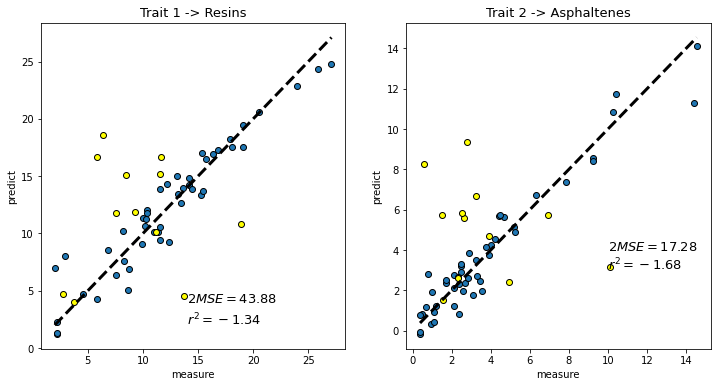

In [117]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(xn1, dtt1, train_size=0.8, random_state= 2, shuffle=True)
x_train2, x_test2, y_train2, y_test2 = train_test_split(xn2, dtt2, train_size=0.8, random_state= 2, shuffle=True)
plsr1 = PLSRegression(n_components=10)
plsr1.fit(x_train1, y_train1)
plsr2 = PLSRegression(n_components=10)
plsr2.fit(x_train2, y_train2)
yprediction1 = plsr1.predict(x_train1)
yprediction1t = plsr1.predict(x_test1)
yprediction2 = plsr2.predict(x_train2)
yprediction2t = plsr2.predict(x_test2)
# ----------------------------------------------------------------------------------------------------------#
fig, ax = plt.subplots(1, 2, figsize= (12, 6))

ax[0].scatter(y_train1, yprediction1, edgecolors=(0, 0, 0))
ax[0].scatter(y_test1, yprediction1t, color='yellow', edgecolors=(0, 0, 0))
ax[0].plot([y_train1.min(), y_train1.max()], [y_train1.min(), y_train1.max()], 'k--', lw=3)
ax[0].text(14, 4, r"2$MSE = "+str(round(mean_squared_error(y_test1, yprediction1t), 2))+r"$", fontsize=13, color='k')
ax[0].text(14, 2, r"$r^2 = "+str(round(r2_score(y_test1, yprediction1t), 2))+r"$", fontsize=13, color='k')
ax[0].set_xlabel('measure')
ax[0].set_ylabel('predict')
ax[0].set_title('Trait 1 -> Resins', fontsize=13)
# ----------------------------------------------------------------------------------------------------------#
ax[1].scatter(y_train2, yprediction2, edgecolors=(0, 0, 0))
ax[1].scatter(y_test2, yprediction2t, color='yellow', edgecolors=(0, 0, 0))
ax[1].plot([y_train2.min(), y_train2.max()], [y_train2.min(), y_train2.max()], 'k--', lw=3)
ax[1].text(10, 4, r"2$MSE = "+str(round(mean_squared_error(y_test2, yprediction2t), 2))+r"$", fontsize=13, color='k')
ax[1].text(10, 3, r"$r^2 = "+str(round(r2_score(y_test2, yprediction2t), 2))+r"$", fontsize=13, color='k')
ax[1].set_xlabel('measure')
ax[1].set_ylabel('predict')
ax[1].set_title('Trait 2 -> Asphaltenes', fontsize=13)
# ----------------------------------------------------------------------------------------------------------#
print('MSE 1 =' + str(round(mean_squared_error(y_test1, yprediction1t), 2)))
print('MSE 2 =' + str(round(mean_squared_error(y_test2, yprediction2t), 2)))

In [129]:
def optimise_pls(X, y, xt, n_comp):
    
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [130]:
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_rs = np.arange(1, 101)
for n_rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(xn1, dtt1, train_size=0.8, random_state=n_rs, shuffle= True)
    
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, 10)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

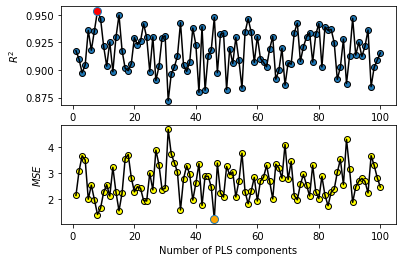

In [131]:
fig, (ax1, ax2) = plt.subplots(2, 1)
#fig, ax = plt.subplots()
ax1.scatter(arr_rs, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_rs, r2s, 'k-')
ax1.plot(arr_rs[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_rs, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_rs, mses, 'k-')
ax2.plot(arr_rs[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

In [132]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=20)
model=PLSRegression(n_components=10) 
x_traint = [] 
x_testt = []
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(xn1):
    x_train = xn1[train_index]
    x_test = xn1[test_index]
    y_train = dtt1[train_index]
    y_test = dtt1[test_index]
    model.fit(x_train, y_train) 
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
 
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    
    model.fit(x_train, y_train) 
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 52.44033383232709
R2. 1 on the test set: -0.7658037257860155
MSE. 2 on the test set: 26.721805061526073
R2. 2 on the test set: -0.08705246035473735
MSE. 3 on the test set: 48.833975676806595
R2. 3 on the test set: -0.6139679694138152
MSE. 4 on the test set: 96.40451587044505
R2. 4 on the test set: -0.6465718368945081
MSE. 5 on the test set: 38.96036892530902
R2. 5 on the test set: -5.617231848758589


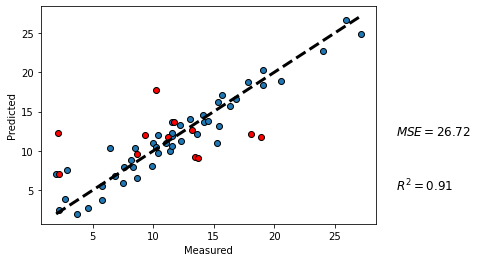

In [133]:
y_tr=np.array(y_traint[r2s.index(max(r2s))])
y_te=np.array(y_testt[r2s.index(max(r2s))]) 
X_tr=np.array(x_traint[r2s.index(max(r2s))]) 
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) 

Y_pred = model.predict(X_tr)
Y_pred_test = model.predict(X_te)

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(30,12, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(30,5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

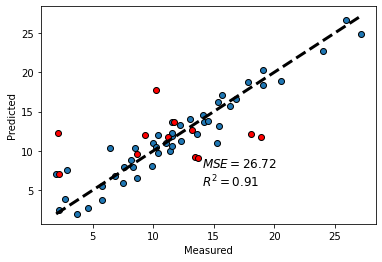

In [134]:
fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(14,8, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(14,5.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()